In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss

In [2]:
base_path = '/Users/shuya/Desktop/ADS/Healthcare/datasetPracticeFusionDiabetes/'

patients = pd.read_csv(f"{base_path}training_SyncPatient.csv")
conditions = pd.read_csv(f"{base_path}training_SyncPatientCondition.csv")
diagnosis = pd.read_csv(f"{base_path}training_SyncDiagnosis.csv")
smoking = pd.read_csv(f"{base_path}training_SyncPatientSmokingStatus.csv")
allergies = pd.read_csv(f"{base_path}training_SyncAllergy.csv")
immunization = pd.read_csv(f"{base_path}training_SyncImmunization.csv")
lab_observations = pd.read_csv(f"{base_path}training_SyncLabObservation.csv")
lab_panels = pd.read_csv(f"{base_path}training_SyncLabPanel.csv")
lab_results = pd.read_csv(f"{base_path}training_SyncLabResult.csv")
medications = pd.read_csv(f"{base_path}training_SyncMedication.csv")
prescriptions = pd.read_csv(f"{base_path}training_SyncPrescription.csv")
transcripts = pd.read_csv(f"{base_path}training_SyncTranscript.csv")
transcript_allergies = pd.read_csv(f"{base_path}training_SyncTranscriptAllergy.csv")
transcript_diagnoses = pd.read_csv(f"{base_path}training_SyncTranscriptDiagnosis.csv")
transcript_medications = pd.read_csv(f"{base_path}training_SyncTranscriptMedication.csv")

In [3]:
# Merging tables that directly use 'PatientGuid'
data = patients.merge(conditions, on='PatientGuid', how='left')
data = data.merge(diagnosis, on='PatientGuid', how='left')
data = data.merge(smoking, on='PatientGuid', how='left')
data = data.merge(allergies, on='PatientGuid', how='left')
data = data.merge(immunization, on='PatientGuid', how='left')

In [4]:
print("Transcripts columns:", transcripts.columns)
print("Transcript Allergies columns:", transcript_allergies.columns)
print("Transcript Diagnoses columns:", transcript_diagnoses.columns)
print("Transcript Medications columns:", transcript_medications.columns)

Transcripts columns: Index(['TranscriptGuid', 'PatientGuid', 'VisitYear', 'Height', 'Weight', 'BMI',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'HeartRate',
       'Temperature', 'PhysicianSpecialty', 'UserGuid'],
      dtype='object')
Transcript Allergies columns: Index(['TranscriptAllergyGuid', 'TranscriptGuid', 'AllergyGuid'], dtype='object')
Transcript Diagnoses columns: Index(['TranscriptDiagnosisGuid', 'TranscriptGuid', 'DiagnosisGuid'], dtype='object')
Transcript Medications columns: Index(['TranscriptMedicationGuid', 'TranscriptGuid', 'MedicationGuid'], dtype='object')


In [5]:
diagnosis.head()

,DiagnosisGuid,PatientGuid,ICD9Code,DiagnosisDescription,StartYear,StopYear,Acute,UserGuid
0,D8873CD9-C72E-4ABD-B0C5-000101A9A72A,BA954BD7-5EE7-4CCF-AB31-07B9C7F72D07,825.0,"Fracture of calcaneus, closed",2012,NaN,0,A65727FD-4E6C-43B9-AE7B-E4088265DDB4
1,70F10549-2A75-44F9-8640-00010B10EFAD,F8D890EA-7920-40AF-BFCF-42010E1BF563,784.0,Headache,0,NaN,1,2925D93F-3904-4D28-8E93-4A5C059E5743
2,A5F5AF96-0B64-472E-BB67-00012544228C,A3AD2D57-5589-47E2-BDB2-1D5B51764896,461.9,"Acute sinusitis, unspecified",2010,2010.0,1,E935F904-AAFE-4148-AB24-70E02EB9005D
3,3C4B7780-6742-4DB5-8DFE-000157ED4DD3,2AC1DCDA-9C11-44ED-A2BE-4B1F2393B68E,V72.31,Routine gynecological examination,2009,NaN,0,60C80223-5A28-4E74-89FF-73505D39BCDD
4,903825EF-AEDD-4F2D-985C-0004D6D95E9B,9DB2B66C-A696-4308-BFA1-4C8F6E97977E,345.90,"Epilepsy, unspecified, without mention of intr...",2010,NaN,0,EC059D01-0352-4E95-ACF5-7D2268064DF7


In [6]:
transcripts.head()

,TranscriptGuid,PatientGuid,VisitYear,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,HeartRate,Temperature,PhysicianSpecialty,UserGuid
0,4E74D809-F0C6-4A4D-8F6F-0000042B3AEA,7F78C9FD-8A95-48DC-B074-FA41F5B41826,2009,63.0,145.8,25.824,NaN,NaN,NaN,NaN,NaN,Family Practice,226D906B-E53A-4EEA-86A8-633D14B98BF2
1,84A5F60E-49F6-4437-BAE1-00004F4D15EE,EE1E2D06-8846-4BF5-9C82-E08BC8798DAE,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,412307EE-D407-4F16-8379-D4A88A7B1122
2,7C45CC93-4799-42A1-B6D6-00008D1B3579,1FF23603-B9D4-42B0-B450-BCD5EA46A025,2010,64.5,133.0,22.474,106.0,66.0,NaN,NaN,98.2,Family Practice,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC
3,375F3C1C-0058-4872-B96E-00009FE9328A,16C2D99F-1494-4DF9-82E6-0FA0F0EB1B63,2011,68.0,125.4,19.065,119.0,64.0,NaN,NaN,98.2,Family Practice,B8CDE35A-5C03-4995-B771-10F660B84F1A
4,66439EEB-2FFB-4711-87F2-0001690835A6,18256C20-BAC8-4F57-A03C-2C7152CE1813,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,6D105E1E-EACC-478E-9454-FBED1F50F888


In [7]:
allergies_with_patient = transcript_allergies.merge(
    transcripts[['TranscriptGuid', 'PatientGuid']], on='TranscriptGuid', how='left'
)

diagnoses_with_patient = transcript_diagnoses.merge(
    transcripts[['TranscriptGuid', 'PatientGuid']], on='TranscriptGuid', how='left'
)

medications_with_patient = transcript_medications.merge(
    transcripts[['TranscriptGuid', 'PatientGuid']], on='TranscriptGuid', how='left'
)

In [8]:
transcript_allergies_agg = allergies_with_patient.groupby('PatientGuid').agg(
    has_allergy=('AllergyGuid', lambda x: 1 if len(x) > 0 else 0)
).reset_index()

transcript_diagnoses_agg = diagnoses_with_patient.groupby('PatientGuid').agg(
    has_diagnosis=('DiagnosisGuid', lambda x: 1 if len(x) > 0 else 0)
).reset_index()

transcript_medications_agg = medications_with_patient.groupby('PatientGuid').agg(
    num_medications=('MedicationGuid', 'count')
).reset_index()


In [9]:
data = data.merge(transcript_allergies_agg, on='PatientGuid', how='left')
data = data.merge(transcript_diagnoses_agg, on='PatientGuid', how='left')
data = data.merge(transcript_medications_agg, on='PatientGuid', how='left')

data['has_allergy'] = data['has_allergy'].fillna(0).astype('int8')
data['has_diagnosis'] = data['has_diagnosis'].fillna(0).astype('int8')
data['num_medications'] = data['num_medications'].fillna(0).astype('int8')

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83324 entries, 0 to 83323
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientGuid               80053 non-null  object 
 1   DMIndicator               80053 non-null  float64
 2   Gender                    80053 non-null  object 
 3   YearOfBirth               80053 non-null  float64
 4   State                     80053 non-null  object 
 5   PracticeGuid              80053 non-null  object 
 6   PatientConditionGuid      21007 non-null  object 
 7   ConditionGuid             21007 non-null  object 
 8   CreatedYear               21007 non-null  float64
 9   DiagnosisGuid             80053 non-null  object 
 10  ICD9Code                  80053 non-null  object 
 11  DiagnosisDescription      80053 non-null  object 
 12  StartYear_x               80053 non-null  float64
 13  StopYear                  4341 non-null   float64
 14  Acute 

In [10]:
data.head()

,PatientGuid,DMIndicator,Gender,YearOfBirth,State,PracticeGuid,PatientConditionGuid,ConditionGuid,CreatedYear,DiagnosisGuid,...,MedicationName,UserGuid_y,ImmunizationGuid,VaccineName,AdministeredYear,CvxCode,UserGuid,has_allergy,has_diagnosis,num_medications
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,NaN,NaN,NaN,CF8EC250-BF6D-4C1C-84E3-489F349C007A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,4
1,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,NaN,NaN,NaN,8EBF3FAC-0B79-4522-8547-5297660101BF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,4
2,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,NaN,NaN,NaN,C2D50116-9E20-470E-8BB9-52F6C1F98B5F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,4
3,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,NaN,NaN,NaN,6CDD359A-1866-4FEC-9759-68DE9EDE8E12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,4
4,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,1929.0,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,NaN,NaN,NaN,633AFDFB-40CB-46B5-8B1D-6A793D715531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,4


In [11]:
diagnosis.head()

,DiagnosisGuid,PatientGuid,ICD9Code,DiagnosisDescription,StartYear,StopYear,Acute,UserGuid
0,D8873CD9-C72E-4ABD-B0C5-000101A9A72A,BA954BD7-5EE7-4CCF-AB31-07B9C7F72D07,825.0,"Fracture of calcaneus, closed",2012,NaN,0,A65727FD-4E6C-43B9-AE7B-E4088265DDB4
1,70F10549-2A75-44F9-8640-00010B10EFAD,F8D890EA-7920-40AF-BFCF-42010E1BF563,784.0,Headache,0,NaN,1,2925D93F-3904-4D28-8E93-4A5C059E5743
2,A5F5AF96-0B64-472E-BB67-00012544228C,A3AD2D57-5589-47E2-BDB2-1D5B51764896,461.9,"Acute sinusitis, unspecified",2010,2010.0,1,E935F904-AAFE-4148-AB24-70E02EB9005D
3,3C4B7780-6742-4DB5-8DFE-000157ED4DD3,2AC1DCDA-9C11-44ED-A2BE-4B1F2393B68E,V72.31,Routine gynecological examination,2009,NaN,0,60C80223-5A28-4E74-89FF-73505D39BCDD
4,903825EF-AEDD-4F2D-985C-0004D6D95E9B,9DB2B66C-A696-4308-BFA1-4C8F6E97977E,345.90,"Epilepsy, unspecified, without mention of intr...",2010,NaN,0,EC059D01-0352-4E95-ACF5-7D2268064DF7


In [12]:
data = data.merge(
    diagnosis[['PatientGuid', 'Acute']],  
    on='PatientGuid',
    how='left', 
    suffixes=('', '_diag') 
)

In [13]:
transcripts.head()

,TranscriptGuid,PatientGuid,VisitYear,Height,Weight,BMI,SystolicBP,DiastolicBP,RespiratoryRate,HeartRate,Temperature,PhysicianSpecialty,UserGuid
0,4E74D809-F0C6-4A4D-8F6F-0000042B3AEA,7F78C9FD-8A95-48DC-B074-FA41F5B41826,2009,63.0,145.8,25.824,NaN,NaN,NaN,NaN,NaN,Family Practice,226D906B-E53A-4EEA-86A8-633D14B98BF2
1,84A5F60E-49F6-4437-BAE1-00004F4D15EE,EE1E2D06-8846-4BF5-9C82-E08BC8798DAE,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,412307EE-D407-4F16-8379-D4A88A7B1122
2,7C45CC93-4799-42A1-B6D6-00008D1B3579,1FF23603-B9D4-42B0-B450-BCD5EA46A025,2010,64.5,133.0,22.474,106.0,66.0,NaN,NaN,98.2,Family Practice,B366A9CC-814C-4B2F-99E5-4DC5C79B9DEC
3,375F3C1C-0058-4872-B96E-00009FE9328A,16C2D99F-1494-4DF9-82E6-0FA0F0EB1B63,2011,68.0,125.4,19.065,119.0,64.0,NaN,NaN,98.2,Family Practice,B8CDE35A-5C03-4995-B771-10F660B84F1A
4,66439EEB-2FFB-4711-87F2-0001690835A6,18256C20-BAC8-4F57-A03C-2C7152CE1813,2011,NaN,0.0,0.000,NaN,NaN,NaN,NaN,NaN,Family Practice,6D105E1E-EACC-478E-9454-FBED1F50F888


In [14]:
# Merging medications might need careful linking if not direct via PatientGuid
medications = medications.merge(prescriptions, on='MedicationGuid', how='left', suffixes=('', '_med'))
data = data.merge(medications, on='PatientGuid', how='left', suffixes=('', '_medi'))

In [15]:
print(data.columns)

Index(['PatientGuid', 'DMIndicator', 'Gender', 'YearOfBirth', 'State',
       'PracticeGuid', 'PatientConditionGuid', 'ConditionGuid', 'CreatedYear',
       'DiagnosisGuid', 'ICD9Code', 'DiagnosisDescription', 'StartYear_x',
       'StopYear', 'Acute', 'UserGuid_x', 'PatientSmokingStatusGuid',
       'SmokingStatusGuid', 'EffectiveYear', 'AllergyGuid', 'AllergyType',
       'StartYear_y', 'ReactionName', 'SeverityName', 'MedicationNDCCode',
       'MedicationName', 'UserGuid_y', 'ImmunizationGuid', 'VaccineName',
       'AdministeredYear', 'CvxCode', 'UserGuid', 'has_allergy',
       'has_diagnosis', 'num_medications', 'Acute_diag', 'MedicationGuid',
       'NdcCode', 'MedicationName_medi', 'MedicationStrength', 'Schedule',
       'DiagnosisGuid_medi', 'UserGuid_medi', 'PrescriptionGuid',
       'PatientGuid_med', 'PrescriptionYear', 'Quantity', 'NumberOfRefills',
       'RefillAsNeeded', 'GenericAllowed', 'UserGuid_med'],
      dtype='object')


In [16]:
# Select initial relevant features (without 'Age' and transcripts data)
selected_features = [
    'PatientGuid', 'Gender', 'YearOfBirth', 'State', 'Acute',
    'has_allergy', 'has_diagnosis', 
    'num_medications', 'DMIndicator'
]

# Filter the dataset to keep only selected features
data = data[selected_features]

# Check the structure of the filtered data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21748515 entries, 0 to 21748514
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PatientGuid      object 
 1   Gender           object 
 2   YearOfBirth      float64
 3   State            object 
 4   Acute            float64
 5   has_allergy      int8   
 6   has_diagnosis    int8   
 7   num_medications  int8   
 8   DMIndicator      float64
dtypes: float64(3), int8(3), object(3)
memory usage: 1.0+ GB
None


In [17]:
data = data.sample(frac=0.01, random_state=42)  # Samples 0.1% of the dataset

In [18]:
data = data.merge(transcripts[['PatientGuid', 'Temperature','SystolicBP', 'DiastolicBP', 'RespiratoryRate']], on='PatientGuid', how='left', suffixes=('', '_trans'))

In [19]:
print(data.columns)

Index(['PatientGuid', 'Gender', 'YearOfBirth', 'State', 'Acute', 'has_allergy',
       'has_diagnosis', 'num_medications', 'DMIndicator', 'Temperature',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate'],
      dtype='object')


In [21]:
data.head()

,PatientGuid,Gender,YearOfBirth,State,Acute,has_allergy,has_diagnosis,num_medications,DMIndicator,Temperature,SystolicBP,DiastolicBP,RespiratoryRate
0,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,1950.0,FL,0.0,0,1,33,1.0,NaN,136.0,80.0,19.0
1,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,1950.0,FL,0.0,0,1,33,1.0,NaN,NaN,NaN,NaN
2,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,1950.0,FL,0.0,0,1,33,1.0,NaN,NaN,NaN,NaN
3,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,1950.0,FL,0.0,0,1,33,1.0,NaN,112.0,73.0,18.0
4,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,1950.0,FL,0.0,0,1,33,1.0,NaN,NaN,NaN,NaN


In [22]:
# Calculate Age from YearOfBirth
data['Age'] = 2012 - data['YearOfBirth']

# Drop YearOfBirth after calculating Age
data = data.drop('YearOfBirth', axis=1)

# Check the structure after adding 'Age'
print(data.head())


                            PatientGuid Gender State  Acute  has_allergy  \
0  30ED0935-3E4B-4401-9F9C-6EAE871D0625      M    FL    0.0            0   
1  30ED0935-3E4B-4401-9F9C-6EAE871D0625      M    FL    0.0            0   
2  30ED0935-3E4B-4401-9F9C-6EAE871D0625      M    FL    0.0            0   
3  30ED0935-3E4B-4401-9F9C-6EAE871D0625      M    FL    0.0            0   
4  30ED0935-3E4B-4401-9F9C-6EAE871D0625      M    FL    0.0            0   

   has_diagnosis  num_medications  DMIndicator  Temperature  SystolicBP  \
0              1               33          1.0          NaN       136.0   
1              1               33          1.0          NaN         NaN   
2              1               33          1.0          NaN         NaN   
3              1               33          1.0          NaN       112.0   
4              1               33          1.0          NaN         NaN   

   DiastolicBP  RespiratoryRate   Age  
0         80.0             19.0  62.0  
1          N

In [23]:
# Ensure transcripts table is not too large by checking duplicates
transcripts = transcripts.drop_duplicates(subset='PatientGuid')

# Merge transcripts data to ensure BMI and other metrics are included
data = data.merge(
    transcripts[['PatientGuid', 'BMI','Height', 'Weight']],
    on='PatientGuid', how='left'
)

# Check the structure after merging transcripts data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7388535 entries, 0 to 7388534
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PatientGuid      object 
 1   Gender           object 
 2   State            object 
 3   Acute            float64
 4   has_allergy      int8   
 5   has_diagnosis    int8   
 6   num_medications  int8   
 7   DMIndicator      float64
 8   Temperature      float64
 9   SystolicBP       float64
 10  DiastolicBP      float64
 11  RespiratoryRate  float64
 12  Age              float64
 13  BMI              float64
 14  Height           float64
 15  Weight           float64
dtypes: float64(10), int8(3), object(3)
memory usage: 753.9+ MB
None


In [24]:
# Fill missing values with 0
data = data.fillna(0)

# Optimize data types to reduce memory usage
data['Age'] = data['Age'].astype('int8')
data['num_medications'] = data['num_medications'].astype('int8')
data['has_allergy'] = data['has_allergy'].astype('int8')
data['has_diagnosis'] = data['has_diagnosis'].astype('int8')

# Check final data structure and memory usage
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7388535 entries, 0 to 7388534
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PatientGuid      object 
 1   Gender           object 
 2   State            object 
 3   Acute            float64
 4   has_allergy      int8   
 5   has_diagnosis    int8   
 6   num_medications  int8   
 7   DMIndicator      float64
 8   Temperature      float64
 9   SystolicBP       float64
 10  DiastolicBP      float64
 11  RespiratoryRate  float64
 12  Age              int8   
 13  BMI              float64
 14  Height           float64
 15  Weight           float64
dtypes: float64(9), int8(4), object(3)
memory usage: 704.6+ MB
None


In [25]:
data.head()

,PatientGuid,Gender,State,Acute,has_allergy,has_diagnosis,num_medications,DMIndicator,Temperature,SystolicBP,DiastolicBP,RespiratoryRate,Age,BMI,Height,Weight
0,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,136.0,80.0,19.0,62,36.368,66.3,227.4
1,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,0.0,0.0,0.0,62,36.368,66.3,227.4
2,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,0.0,0.0,0.0,62,36.368,66.3,227.4
3,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,112.0,73.0,18.0,62,36.368,66.3,227.4
4,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,0.0,0.0,0.0,62,36.368,66.3,227.4


In [26]:
print(data.columns)

Index(['PatientGuid', 'Gender', 'State', 'Acute', 'has_allergy',
       'has_diagnosis', 'num_medications', 'DMIndicator', 'Temperature',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'Age', 'BMI', 'Height',
       'Weight'],
      dtype='object')


In [27]:
data.to_csv('/Users/shuya/Desktop/ADS/Healthcare/datasetPracticeFusionDiabetes/merged_data_updated.csv', index=False)
print("Merged dataset saved as 'merged_data_updated.csv'")

Merged dataset saved as 'merged_data_updated.csv'


In [28]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [29]:
# Load your dataset (replace 'your_data.csv' with your actual file)
data = pd.read_csv('/Users/shuya/Desktop/ADS/Healthcare/datasetPracticeFusionDiabetes/merged_data_updated.csv')

In [30]:
print(f"Total rows: {data.shape[0]}, Total columns: {data.shape[1]}")

Total rows: 7388535, Total columns: 16


In [31]:
data.head()

,PatientGuid,Gender,State,Acute,has_allergy,has_diagnosis,num_medications,DMIndicator,Temperature,SystolicBP,DiastolicBP,RespiratoryRate,Age,BMI,Height,Weight
0,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,136.0,80.0,19.0,62,36.368,66.3,227.4
1,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,0.0,0.0,0.0,62,36.368,66.3,227.4
2,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,0.0,0.0,0.0,62,36.368,66.3,227.4
3,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,112.0,73.0,18.0,62,36.368,66.3,227.4
4,30ED0935-3E4B-4401-9F9C-6EAE871D0625,M,FL,0.0,0,1,33,1.0,0.0,0.0,0.0,0.0,62,36.368,66.3,227.4


In [32]:
print(data.columns)

Index(['PatientGuid', 'Gender', 'State', 'Acute', 'has_allergy',
       'has_diagnosis', 'num_medications', 'DMIndicator', 'Temperature',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'Age', 'BMI', 'Height',
       'Weight'],
      dtype='object')


In [33]:
data = data.sample(frac=0.01, random_state=42)  # Samples 0.1% of the dataset

In [35]:
print(f"Total rows: {data.shape[0]}, Total columns: {data.shape[1]}")

Total rows: 73885, Total columns: 16


In [36]:
data = data.sample(frac=0.3, random_state=42)  

In [37]:
# Inspect the columns to find null or zero values
print(data.isnull().sum())  # Null values
print((data == 0).sum())  # Zero values

# Define columns to handle for KNN imputation
columns_to_impute = ['BMI', 'SystolicBP', 'DiastolicBP', 'Height', 'Weight','Temperature']

# Replace 0 with NaN for imputation purposes
data[columns_to_impute] = data[columns_to_impute].replace(0, np.nan)

# 1. KNN Imputation (n_neighbors=5 means K=5)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN to the selected columns
data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

# Example of saving the final KNN-imputed dataframe
data.to_csv('/Users/shuya/Desktop/ADS/Healthcare/datasetPracticeFusionDiabetes/knn_imputed_data.csv', index=False)

# Optional: Display the resulting dataframe
print(data.head())

PatientGuid            0
Gender                 0
State                  0
Acute                  0
has_allergy            0
has_diagnosis          0
num_medications        0
DMIndicator            0
Temperature        10750
SystolicBP          6191
DiastolicBP         6191
RespiratoryRate        0
Age                    0
BMI                11643
Height             11567
Weight              8479
dtype: int64
PatientGuid            0
Gender                 0
State                  0
Acute              19172
has_allergy        21646
has_diagnosis         55
num_medications      580
DMIndicator        16262
Temperature            0
SystolicBP             0
DiastolicBP            0
RespiratoryRate    11890
Age                    1
BMI                    0
Height                 0
Weight                 0
dtype: int64
                                  PatientGuid Gender State  Acute  \
137374   8B646975-9275-4ECE-9EEF-6E2D088A68FE      F    FL    0.0   
2388055  1B2F8598-B43E-4E05-9D7C-228

In [38]:
print(f"Total rows: {data.shape[0]}, Total columns: {data.shape[1]}")

Total rows: 22166, Total columns: 16


In [40]:
import pandas as pd

median_values = data[['SystolicBP', 'DiastolicBP', 'RespiratoryRate']].median()

data['SystolicBP'].fillna(median_values['SystolicBP'], inplace=True)
data['DiastolicBP'].fillna(median_values['DiastolicBP'], inplace=True)
data['RespiratoryRate'].fillna(median_values['RespiratoryRate'], inplace=True)
 
data['has_allergy'].fillna(0, inplace=True) 
data['has_diagnosis'].fillna(0, inplace=True)  

if 'HeartRate' in data.columns:
    data.drop('HeartRate', axis=1, inplace=True)

print("Data after dropping 'HeartRate' and imputing other columns:")
print(data.head())

data.to_csv('/Users/shuya/Desktop/ADS/Healthcare/datasetPracticeFusionDiabetes/updated_data.csv', index=False)

Data after dropping 'HeartRate' and imputing other columns:
                                  PatientGuid Gender State  Acute  \
137374   8B646975-9275-4ECE-9EEF-6E2D088A68FE      F    FL    0.0   
2388055  1B2F8598-B43E-4E05-9D7C-2283D06FB291      M    CA    0.0   
7267851  366C8D52-E684-475C-9D52-6E2428543B9C      M    NH    0.0   
2252901  C56CFDA2-2618-4A96-AF53-93BC30DB0B38      M    CA    0.0   
489199   614FDE5C-C98A-419E-A983-74A059619427      M    CA    1.0   

         has_allergy  has_diagnosis  num_medications  DMIndicator  \
137374             0              1               69          0.0   
2388055            0              1               47          0.0   
7267851            0              1                2          0.0   
2252901            0              1               24          0.0   
489199             0              1               19          0.0   

         Temperature  SystolicBP  DiastolicBP  RespiratoryRate  Age      BMI  \
137374         97.78       133

In [41]:
data.head()

,PatientGuid,Gender,State,Acute,has_allergy,has_diagnosis,num_medications,DMIndicator,Temperature,SystolicBP,DiastolicBP,RespiratoryRate,Age,BMI,Height,Weight
137374,8B646975-9275-4ECE-9EEF-6E2D088A68FE,F,FL,0.0,0,1,69,0.0,97.78,133.0,85.0,0.0,42,29.6086,66.1,169.76
2388055,1B2F8598-B43E-4E05-9D7C-2283D06FB291,M,CA,0.0,0,1,47,0.0,98.00,120.0,80.0,0.0,23,11.9370,112.0,213.00
7267851,366C8D52-E684-475C-9D52-6E2428543B9C,M,NH,0.0,0,1,2,0.0,97.40,140.0,90.0,0.0,45,34.1392,67.9,158.60
2252901,C56CFDA2-2618-4A96-AF53-93BC30DB0B38,M,CA,0.0,0,1,24,0.0,98.20,132.0,80.0,12.0,62,24.9590,65.0,150.00
489199,614FDE5C-C98A-419E-A983-74A059619427,M,CA,1.0,0,1,19,0.0,98.40,160.0,102.0,16.0,69,28.0510,64.5,166.00


In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [400]:
data=pd.read_csv('/Users/shuya/Desktop/ADS/Healthcare/datasetPracticeFusionDiabetes/updated_data.csv')

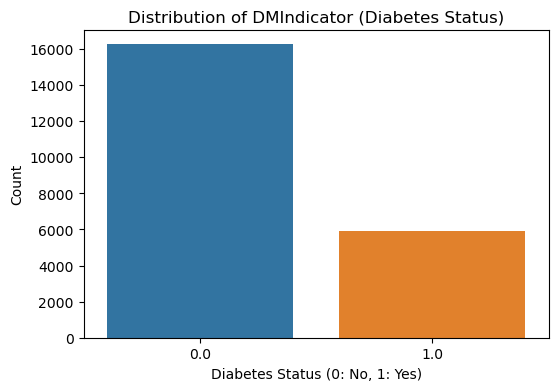

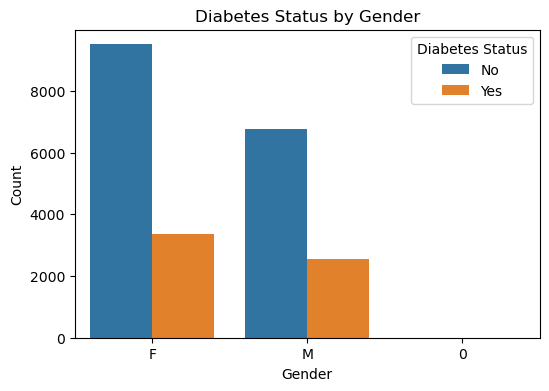

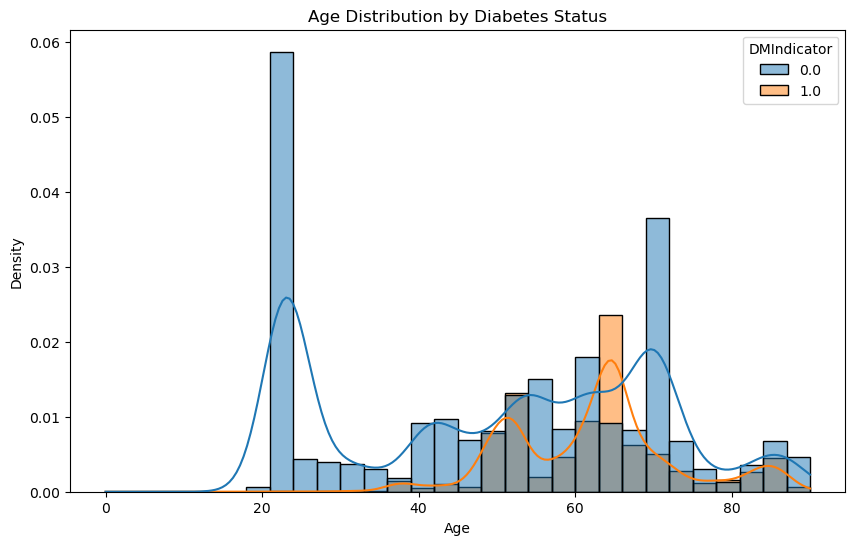

In [401]:
# Distribution of DMIndicator
plt.figure(figsize=(6, 4))
sns.countplot(x='DMIndicator', data=data)
plt.title('Distribution of DMIndicator (Diabetes Status)')
plt.xlabel('Diabetes Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Distribution by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='DMIndicator', data=data)
plt.title('Diabetes Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Distribution by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='DMIndicator', bins=30, kde=True, stat='density')
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


In [402]:
data.head()
print (data.columns)

Index(['PatientGuid', 'Gender', 'State', 'Acute', 'has_allergy',
       'has_diagnosis', 'num_medications', 'DMIndicator', 'Temperature',
       'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'Age', 'BMI', 'Height',
       'Weight'],
      dtype='object')


In [403]:
# Select the relevant columns for training
relevant_columns = [
    'PatientGuid','DMIndicator', 'Gender','State', 'Age', 'Acute',
     'Height', 'Weight', 'BMI', 'SystolicBP','has_allergy', 'has_diagnosis', 'num_medications',
    'DiastolicBP', 'RespiratoryRate', 'Temperature',
]

# Filter the dataset
data_filtered = data[relevant_columns].copy()

# Check for any missing values and handle them if necessary
print(data_filtered.isnull().sum())


PatientGuid        0
DMIndicator        0
Gender             0
State              0
Age                0
Acute              0
Height             0
Weight             0
BMI                0
SystolicBP         0
has_allergy        0
has_diagnosis      0
num_medications    0
DiastolicBP        0
RespiratoryRate    0
Temperature        0
dtype: int64


In [404]:
data_filtered.head()

,PatientGuid,DMIndicator,Gender,State,Age,Acute,Height,Weight,BMI,SystolicBP,has_allergy,has_diagnosis,num_medications,DiastolicBP,RespiratoryRate,Temperature
0,8B646975-9275-4ECE-9EEF-6E2D088A68FE,0.0,F,FL,42,0.0,66.1,169.76,29.6086,133.0,0,1,69,85.0,0.0,97.78
1,1B2F8598-B43E-4E05-9D7C-2283D06FB291,0.0,M,CA,23,0.0,112.0,213.00,11.9370,120.0,0,1,47,80.0,0.0,98.00
2,366C8D52-E684-475C-9D52-6E2428543B9C,0.0,M,NH,45,0.0,67.9,158.60,34.1392,140.0,0,1,2,90.0,0.0,97.40
3,C56CFDA2-2618-4A96-AF53-93BC30DB0B38,0.0,M,CA,62,0.0,65.0,150.00,24.9590,132.0,0,1,24,80.0,12.0,98.20
4,614FDE5C-C98A-419E-A983-74A059619427,0.0,M,CA,69,1.0,64.5,166.00,28.0510,160.0,0,1,19,102.0,16.0,98.40


In [405]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Gender'
le = LabelEncoder()
data_filtered['Gender'] = le.fit_transform(data_filtered['Gender'])

In [406]:
data_filtered = pd.get_dummies(data_filtered, columns=['State'], drop_first=True)

print("Encoded columns:", data_filtered.columns)
print(data_filtered.head())


Encoded columns: Index(['PatientGuid', 'DMIndicator', 'Gender', 'Age', 'Acute', 'Height',
       'Weight', 'BMI', 'SystolicBP', 'has_allergy', 'has_diagnosis',
       'num_medications', 'DiastolicBP', 'RespiratoryRate', 'Temperature',
       'State_AL', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_NC', 'State_ND',
       'State_NE', 'State_NH', 'State_NJ', 'State_NV', 'State_NY', 'State_OH',
       'State_OK', 'State_PA', 'State_PR', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_WA', 'State_WV', 'State_WY'],
      dtype='object')
                            PatientGuid  DMIndicator  Gender  Age  Acute  \
0  8B646975-9275-4ECE-9EEF-6E2D088A68FE          0.0       1   42    0.0   
1  1B2F8598-B43E-4E05-9D7C-2283D06FB291          

In [407]:
X = data_filtered.drop(['DMIndicator'], axis=1)
y = data_filtered['DMIndicator']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (17732, 55)
Validation set shape: (4434, 55)


In [408]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with the median
numerical_features = ['Age', 'Acute', 'Height', 'Weight', 'BMI', 'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'Temperature','has_allergy', 'has_diagnosis', 'num_medications']
imputer = SimpleImputer(strategy='median')
data_filtered[numerical_features] = imputer.fit_transform(data_filtered[numerical_features])
# Drop rows where the target 'DMIndicator' is NaN
data_filtered = data_filtered.dropna(subset=['DMIndicator'])

In [409]:
print(f"Number of NaN in 'DMIndicator': {data_filtered['DMIndicator'].isna().sum()}")
print("Unique values in 'DMIndicator':", data_filtered['DMIndicator'].unique())

data_filtered = data_filtered.dropna(subset=['DMIndicator'])

print("Unique values after dropping NaN:", data_filtered['DMIndicator'].unique())

data_filtered['DMIndicator'] = data_filtered['DMIndicator'].astype(int)

print(data_filtered['DMIndicator'].dtype)



Number of NaN in 'DMIndicator': 0
Unique values in 'DMIndicator': [0. 1.]
Unique values after dropping NaN: [0. 1.]
int64


In [410]:
X = data_filtered.drop(['DMIndicator','PatientGuid'], axis=1)
y = data_filtered['DMIndicator']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Any NaN in y_train: {y_train.isna().sum()}")
print(f"Any NaN in y_val: {y_val.isna().sum()}")


Any NaN in y_train: 0
Any NaN in y_val: 0


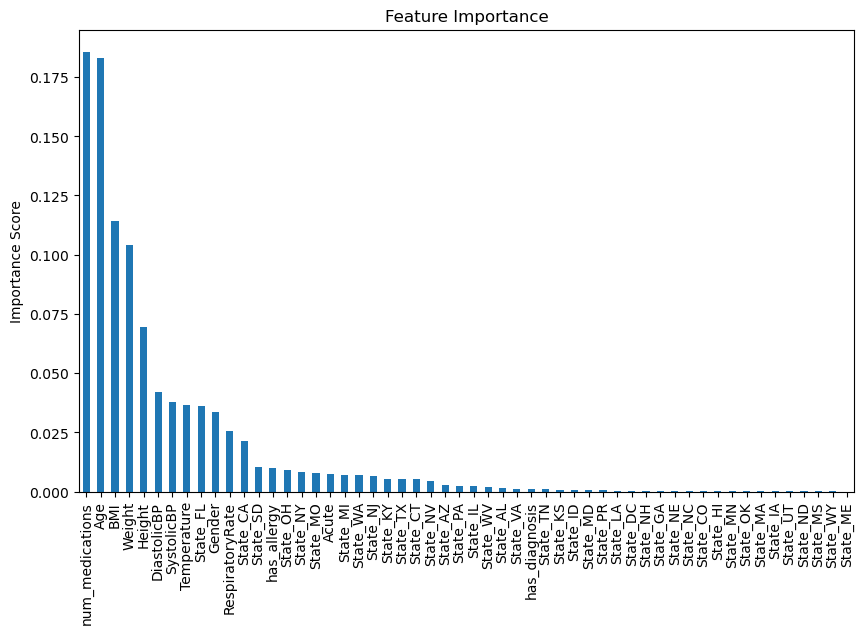

Feature Importance Scores:
 num_medications    0.185750
Age                0.182807
BMI                0.114020
Weight             0.103933
Height             0.069248
DiastolicBP        0.041862
SystolicBP         0.037734
Temperature        0.036454
State_FL           0.035902
Gender             0.033589
RespiratoryRate    0.025645
State_CA           0.021440
State_SD           0.010307
has_allergy        0.009952
State_OH           0.009181
State_NY           0.008222
State_MO           0.007673
Acute              0.007369
State_MI           0.006956
State_WA           0.006807
State_NJ           0.006425
State_KY           0.005279
State_TX           0.005275
State_CT           0.005209
State_NV           0.004413
State_AZ           0.002798
State_PA           0.002442
State_IL           0.002404
State_WV           0.002082
State_AL           0.001289
State_VA           0.001190
has_diagnosis      0.001160
State_TN           0.000865
State_KS           0.000611
State_ID           0

In [411]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# 训练模型获取特征重要性
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 提取特征重要性并可视化
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()

print("Feature Importance Scores:\n", feature_importances)

In [412]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# 更新后的特征集
selected_features = [
    'PatientGuid', 'Gender', 'State', 'Age', 'BMI', 
    'num_medications'
]

# 过滤数据集，保留所需的特征
data_filtered = data[selected_features + ['DMIndicator']].copy()

# 检查是否有缺失值并处理
print(data_filtered.isnull().sum())

# 编码 Gender 列
le = LabelEncoder()
data_filtered['Gender'] = le.fit_transform(data_filtered['Gender'])

# 对 State 进行 One-Hot 编码
data_filtered = pd.get_dummies(data_filtered, columns=['State'], drop_first=True)

# 确保没有 NaN
data_filtered = data_filtered.fillna(0)

# 分离特征和标签
X = data_filtered.drop(['DMIndicator', 'PatientGuid'], axis=1)
y = data_filtered['DMIndicator']

# 分割数据集为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林模型
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred = model.predict_proba(X_val)[:, 1]

# 计算 Accuracy 和 ROC-AUC
val_accuracy = accuracy_score(y_val, (y_val_pred > 0.5).astype(int))
val_roc_auc = roc_auc_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")

PatientGuid        0
Gender             0
State              0
Age                0
BMI                0
num_medications    0
DMIndicator        0
dtype: int64
Validation Accuracy: 0.8295
Validation ROC AUC: 0.9535


In [413]:
test_data_path = '/Users/shuya/Desktop/ADS/Healthcare/datasetPracticeFusionDiabetes/test_SyncPatient.csv'
test_data = pd.read_csv(test_data_path)

test_data['Age'] = 2012 - test_data['YearOfBirth']
test_data = test_data.drop(['YearOfBirth', 'PracticeGuid'], axis=1)

In [414]:
print(f"Test Data Shape: {test_data.shape}")
print(f"Original Test Data Shape: {original_test_data.shape}")
# 查看合并后是否有 NaN
print(test_data.isnull().sum())
# 检查 PatientGuid 是否唯一且匹配
print(f"Unique PatientGuids in Original Test Data: {original_test_data['PatientGuid'].nunique()}")
print(f"Unique PatientGuids in Processed Test Data: {test_data['PatientGuid'].nunique()}")

Test Data Shape: (3348, 4)
Original Test Data Shape: (3348, 5)
PatientGuid    0
Gender         0
State          0
Age            0
dtype: int64
Unique PatientGuids in Original Test Data: 3348
Unique PatientGuids in Processed Test Data: 3348


In [415]:
# 合并其他表的数据，并使用 groupby 和聚合
transcript_features = transcripts[['PatientGuid', 'BMI']]

# 使用 groupby 确保每个 PatientGuid 只有一行
transcript_features = transcript_features.groupby('PatientGuid').mean().reset_index()


In [416]:
# 合并其他表的数据，并使用 groupby 和聚合
transcript_features = transcripts[['PatientGuid', 'Height', 'Weight', 'BMI', 
                                   'SystolicBP', 'DiastolicBP', 'RespiratoryRate', 'Temperature']]

# 使用 groupby 确保每个 PatientGuid 只有一行
transcript_features = transcript_features.groupby('PatientGuid').mean().reset_index()


In [417]:
print(f"Test Data Shape: {test_data.shape}")
print(f"Original Test Data Shape: {original_test_data.shape}")
# 查看合并后是否有 NaN
print(test_data.isnull().sum())

# 检查 PatientGuid 是否唯一且匹配
print(f"Unique PatientGuids in Original Test Data: {original_test_data['PatientGuid'].nunique()}")
print(f"Unique PatientGuids in Processed Test Data: {test_data['PatientGuid'].nunique()}")

Test Data Shape: (3348, 4)
Original Test Data Shape: (3348, 5)
PatientGuid    0
Gender         0
State          0
Age            0
dtype: int64
Unique PatientGuids in Original Test Data: 3348
Unique PatientGuids in Processed Test Data: 3348


In [418]:
transcript_features = transcripts.groupby('PatientGuid').agg({
    'BMI': 'mean'
}).reset_index()

In [419]:
print(f"Test Data Shape: {test_data.shape}")
print(f"Original Test Data Shape: {original_test_data.shape}")
# 查看合并后是否有 NaN
print(test_data.isnull().sum())

# 检查 PatientGuid 是否唯一且匹配
print(f"Unique PatientGuids in Original Test Data: {original_test_data['PatientGuid'].nunique()}")
print(f"Unique PatientGuids in Processed Test Data: {test_data['PatientGuid'].nunique()}")

Test Data Shape: (3348, 4)
Original Test Data Shape: (3348, 5)
PatientGuid    0
Gender         0
State          0
Age            0
dtype: int64
Unique PatientGuids in Original Test Data: 3348
Unique PatientGuids in Processed Test Data: 3348


In [420]:
# 合并 transcripts 的特征到 test_data
test_data = test_data.merge(transcript_features, on='PatientGuid', how='left')

In [421]:
print(f"Test Data Shape: {test_data.shape}")
print(f"Original Test Data Shape: {original_test_data.shape}")
# 查看合并后是否有 NaN
print(test_data.isnull().sum())

# 检查 PatientGuid 是否唯一且匹配
print(f"Unique PatientGuids in Original Test Data: {original_test_data['PatientGuid'].nunique()}")
print(f"Unique PatientGuids in Processed Test Data: {test_data['PatientGuid'].nunique()}")

Test Data Shape: (3348, 5)
Original Test Data Shape: (3348, 5)
PatientGuid    0
Gender         0
State          0
Age            0
BMI            0
dtype: int64
Unique PatientGuids in Original Test Data: 3348
Unique PatientGuids in Processed Test Data: 3348


In [422]:
transcript_medications_agg = medications_with_patient.groupby('PatientGuid').agg(
    num_medications=('MedicationGuid', 'count')
).reset_index()

test_data = test_data.merge(transcript_medications_agg, on='PatientGuid', how='left')

test_data['num_medications'].fillna(0, inplace=True)

print(f"Test Data Shape After Merge: {test_data.shape}")


Test Data Shape After Merge: (3348, 6)


In [423]:
print(f"Test Data Shape: {test_data.shape}")
print(f"Original Test Data Shape: {original_test_data.shape}")
# 查看合并后是否有 NaN
print(test_data.isnull().sum())

# 检查 PatientGuid 是否唯一且匹配
print(f"Unique PatientGuids in Original Test Data: {original_test_data['PatientGuid'].nunique()}")
print(f"Unique PatientGuids in Processed Test Data: {test_data['PatientGuid'].nunique()}")

# 删除 'Acute' 列
if 'Acute' in test_data.columns:
    test_data = test_data.drop('Acute', axis=1)
    print("'Acute' column dropped.")

# 再次检查列的完整性
print(f"Test Data Shape after dropping 'Acute': {test_data.shape}")
print(test_data.head())

Test Data Shape: (3348, 6)
Original Test Data Shape: (3348, 5)
PatientGuid        0
Gender             0
State              0
Age                0
BMI                0
num_medications    0
dtype: int64
Unique PatientGuids in Original Test Data: 3348
Unique PatientGuids in Processed Test Data: 3348
Test Data Shape after dropping 'Acute': (3348, 6)
                            PatientGuid Gender State  Age     BMI  \
0  027AC271-0852-4DDD-99C2-A74FE50066E0      F    CA   34  37.597   
1  C5D4C6FA-A2B3-4CCD-A8D5-A760127CE47D      F    PA   71  30.117   
2  1F4D1486-7632-4576-AC92-A760680D1DC9      M    VA   74  27.093   
3  0F6AD971-F133-4BD7-B508-A76788D9C46C      M    OH   60  37.505   
4  1E23496C-7AAF-4A91-AAF4-A769BD439E67      F    FL   51  27.583   

   num_medications  
0              1.0  
1              0.0  
2              0.0  
3              1.0  
4              0.0  


In [424]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# 编码 Gender 列
test_data['Gender'] = le.transform(test_data['Gender'])

# 对 State 进行 One-Hot 编码
test_data = pd.get_dummies(test_data, columns=['State'], drop_first=True)

# 补全训练集中有而测试集中没有的列
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

# 确保列顺序与训练集一致
test_data = test_data[X_train.columns]

# 初始化 SimpleImputer，仅对 'Age', 'BMI', 'Weight' 使用中位数填充
columns_to_impute = ['Age', 'BMI']
imputer = SimpleImputer(strategy='median')

# 填充这些列的缺失值
test_data[columns_to_impute] = imputer.fit_transform(test_data[columns_to_impute])

# 将其他列的缺失值填充为 0
test_data.fillna(0, inplace=True)

# 再次检查是否还有缺失值
print(test_data.isnull().sum())

# 确认处理后的测试集信息
print(f"Test Data Shape: {test_data.shape}")
print(test_data.head())

Gender             0
Age                0
BMI                0
num_medications    0
State_AL           0
State_AZ           0
State_CA           0
State_CO           0
State_CT           0
State_DC           0
State_FL           0
State_GA           0
State_HI           0
State_IA           0
State_ID           0
State_IL           0
State_KS           0
State_KY           0
State_LA           0
State_MA           0
State_MD           0
State_ME           0
State_MI           0
State_MN           0
State_MO           0
State_MS           0
State_NC           0
State_ND           0
State_NE           0
State_NH           0
State_NJ           0
State_NV           0
State_NY           0
State_OH           0
State_OK           0
State_PA           0
State_PR           0
State_SD           0
State_TN           0
State_TX           0
State_UT           0
State_VA           0
State_WA           0
State_WV           0
State_WY           0
dtype: int64
Test Data Shape: (3348, 45)
   Gender   Ag

In [425]:
test_predictions = model.predict_proba(test_data)[:, 1]

original_test_data = pd.read_csv(test_data_path)
submission = pd.DataFrame({
    'PatientGuid': original_test_data['PatientGuid'],
    'DMIndicatorForecast': test_predictions
})

submission_path = '/Users/shuya/Desktop/ADS/Healthcare/datasetPracticeFusionDiabetes/test_SyncPatientForecast_submitted.csv'
submission.to_csv(submission_path, index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [426]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 准备训练数据（去除 PatientGuid 和 DMIndicator 列）
X_train = data_filtered.drop(['DMIndicator', 'PatientGuid'], axis=1)
y_train = data_filtered['DMIndicator']

# 初始化随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# 使用交叉验证计算 Brier Score
brier_scores = cross_val_score(
    rf_model, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='neg_brier_score'  # 使用负的 Brier Score
)

# 将负的 Brier Score 转换为正值
brier_scores = -brier_scores

# 打印平均 Brier Score 和标准差
print(f"Cross-validated Brier Score: {np.mean(brier_scores):.4f} (+/- {np.std(brier_scores) * 2:.4f})")

Cross-validated Brier Score: 0.1183 (+/- 0.0026)
